In [25]:
import pandas as pd
import numpy as np
idmode = "partyid"
scaleddf=pd.read_csv('Data_party_qs_removed_enumScale(for q2).csv')
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Other"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "No - none"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Don't know"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Scottish National Party (SNP)"],inplace=True)
scaleddf.drop(scaleddf.index[scaleddf[idmode] == "Plaid Cymru"],inplace=True)
scaleddfnoid = scaleddf.drop(idmode,axis = 1)

label = scaleddf[idmode]
vals = scaleddfnoid.values
print(type(scaleddf))

kmeansdata = scaleddf.drop([idmode],axis =1)
kmeansmatrix = kmeansdata.to_numpy()
scaleddf = scaleddf.reset_index(drop=True)
print(np.unique(label))


<class 'pandas.core.frame.DataFrame'>
['Brexit Party' 'Conservative' 'Green Party' 'Labour' 'Liberal Democrat'
 'United Kingdom Independence Party (UKIP)']


In [31]:
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from purity_check import purity_check





def kmeans_distance(cluster,data_compare,n_clusters):
    cost_matrix = np.zeros([data_compare.shape[0],n_clusters])
    for i in range(data_compare.shape[0]):
        point_costs = []
        for c in range(n_clusters):
            diss = np.linalg.norm(data_compare[i,:]-cluster[c,:])
            cost_matrix[i,c]=diss
    return cost_matrix


def optimal_cluster_assignments_lists(optimal_cluster_assignments,stage=None):
    #scaleddf = scaleddf.reset_index(drop=True)
    optimal_cluster_assignments_names = []
    optimal_cluster_assignments_number = []
    for i in range(optimal_cluster_assignments[0].shape[0]):
        name = scaleddf.loc[optimal_cluster_assignments[0][i],idmode]
        cluster_number = optimal_cluster_assignments[1][i]
        name_count = 0 
        for x in range(len(optimal_cluster_assignments_names)):
                if name in optimal_cluster_assignments_names[x]:
                    name_count += 1
        if name_count != 0:
            name = name + str(name_count+1)
        if stage != None:
            print(name)
            name = name + "_stage_" + str(stage)
        optimal_cluster_assignments_names.append(name)
        optimal_cluster_assignments_number.append(cluster_number)
    return optimal_cluster_assignments_names, optimal_cluster_assignments_number

def kmpurity(input,curmethod):
    
    purity_values = [] 
    cluster_numbers = []
    for i in range(6,8):
        print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i+1)
        kmeans.fit_predict(input)
        kmeans_cost = kmeans_distance(kmeans.cluster_centers_,input,i)
        optimal_assignments = linear_sum_assignment(kmeans_cost)
        print(optimal_assignments)
        optimal_assignments = optimal_cluster_assignments_lists(optimal_assignments)
        print(optimal_assignments)
        mean_purity = purity_check(optimal_assignments[0],scaleddf,i,vote_or_pref=idmode)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(purity_values)
#normal k means
"""def kmpurity(input,curmethod):
    purity_values = [] 
    cluster_numbers = []
    for i in range(6,18):
        print(i)
        cluster_numbers.append(i)
        kmeans = KMeans( n_clusters = i+1)
        kmeans.fit_predict(input)
        mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
        purity_values.append(mean_purity)
    
    print(curmethod)
    purities[curmethod]=purity_values.copy()

   
    plt.plot(purity_values)
    """
purities = dict()

In [19]:
#kmeansdata = scaleddf.drop(['generalelectionVote','envirogrowth','immigcultural','immigself','immigecon','euintegrationself','happyeuleave'])


<class 'pandas.core.frame.DataFrame'>


In [4]:

purity_values = [] 
cluster_numbers = []
for i in range(6,18):
    print(i)
    cluster_numbers.append(i)
    kmeans = KMeans( n_clusters = i+1)
    kmeans.fit_predict(kmeansmatrix)
    mean_purity = purity_check(kmeans.labels_,scaleddf,i,vote_or_pref=idmode)
    purity_values.append(mean_purity)

6
7
8
9
10
11
12
13
14
15
16
17


In [129]:
purities = dict()

<class 'dict'>
()
{'PCA': [0.42600910397459124, 0.42853604876294427, 0.4276931307996039, 0.4284206325232105, 0.4289157343964485, 0.42299259765167746, 0.4274749835240665, 0.42731091487691636, 0.4255804883500952, 0.42468982270336136, 0.427811333303182, 0.42610055960155835], 'LDA': [0.6947022317979045, 0.7601595116564172, 0.7568932699881858, 0.741958187331559, 0.7223480398556598, 0.7476342829735247, 0.7592535091047403, 0.7269651989291934, 0.7235713868286446, 0.7159546082902479, 0.7217631120788294, 0.7594834987623847], 'LDA to 5D': [0.6893786735703387, 0.7428298742293655, 0.686525338453183, 0.7296625520578627, 0.7123668684469948, 0.700344902101521, 0.7223966054733988, 0.6846403738740884, 0.6894568318372377, 0.719631929024222, 0.7340568031549494, 0.725247409174153], 'NCA': [0.7390566569977578, 0.694741313303882, 0.6923692480129499, 0.7173855721723866, 0.7089015772891945, 0.7256663495078951, 0.7277646419533429, 0.7327353655115953, 0.7348439501151978, 0.7317347621054353, 0.7336796198092363, 0

Text(0.5, 1.0, 'Comparison of Kmeans Purities with Dim Reduction')

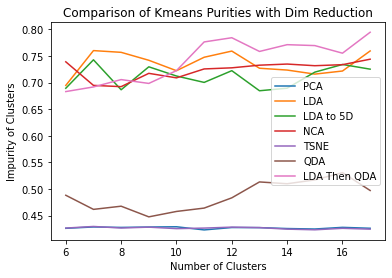

In [145]:
print(type(purities))
print(np.shape(purities))
print(purities)
for i in purities.keys():
    plt.plot(range(6,18),purities[i],label = i)
    
    plt.legend()
plt.xlabel("Number of Clusters")
plt.ylabel("Impurity of Clusters")

plt.title("Comparison of Kmeans Purities with Dim Reduction")

C:\Users\kiera\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


6
7
8
9
10
11
12
13
14
15
16
17
TSNE


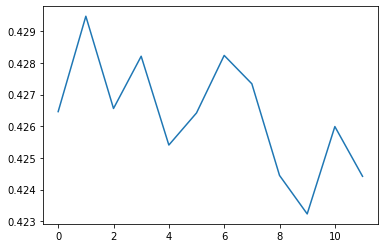

In [139]:
from sklearn.manifold import TSNE
tsnedata = TSNE(n_components=2,learning_rate='auto').fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(tsnedata,"TSNE")

In [32]:
from sklearn.decomposition import PCA
pcadata = PCA(n_components=2).fit_transform(kmeansmatrix)
purity_values = [] 
cluster_numbers = []
kmpurity(pcadata,"PCA")


6
(array([ 1719,  5006,  8246, 14686, 18004, 21425], dtype=int64), array([3, 1, 5, 2, 4, 0]))
(['Conservative', 'Conservative2', 'Conservative3', 'Labour', 'Brexit Party', 'Liberal Democrat'], [3, 1, 5, 2, 4, 0])


ValueError: max() arg is an empty sequence

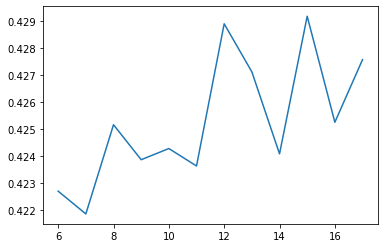

In [14]:
plt.plot(range(6,18),purities["PCA"])

6
7
8
9
10
11
12
13
14
15
16
17
LDA to 5D


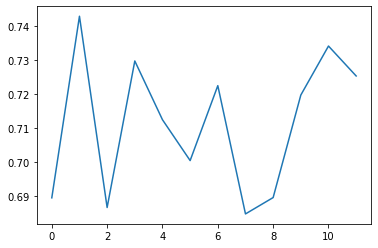

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
data = lda.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(data,"LDA to 5D")




6
7
8
9
10
11
12
13
14
15
16
17
NCA


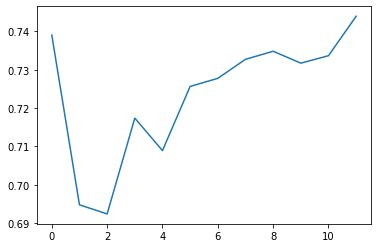

In [135]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)
data =nca.fit_transform(kmeansdata,scaleddf[idmode])
kmpurity(data,"NCA")


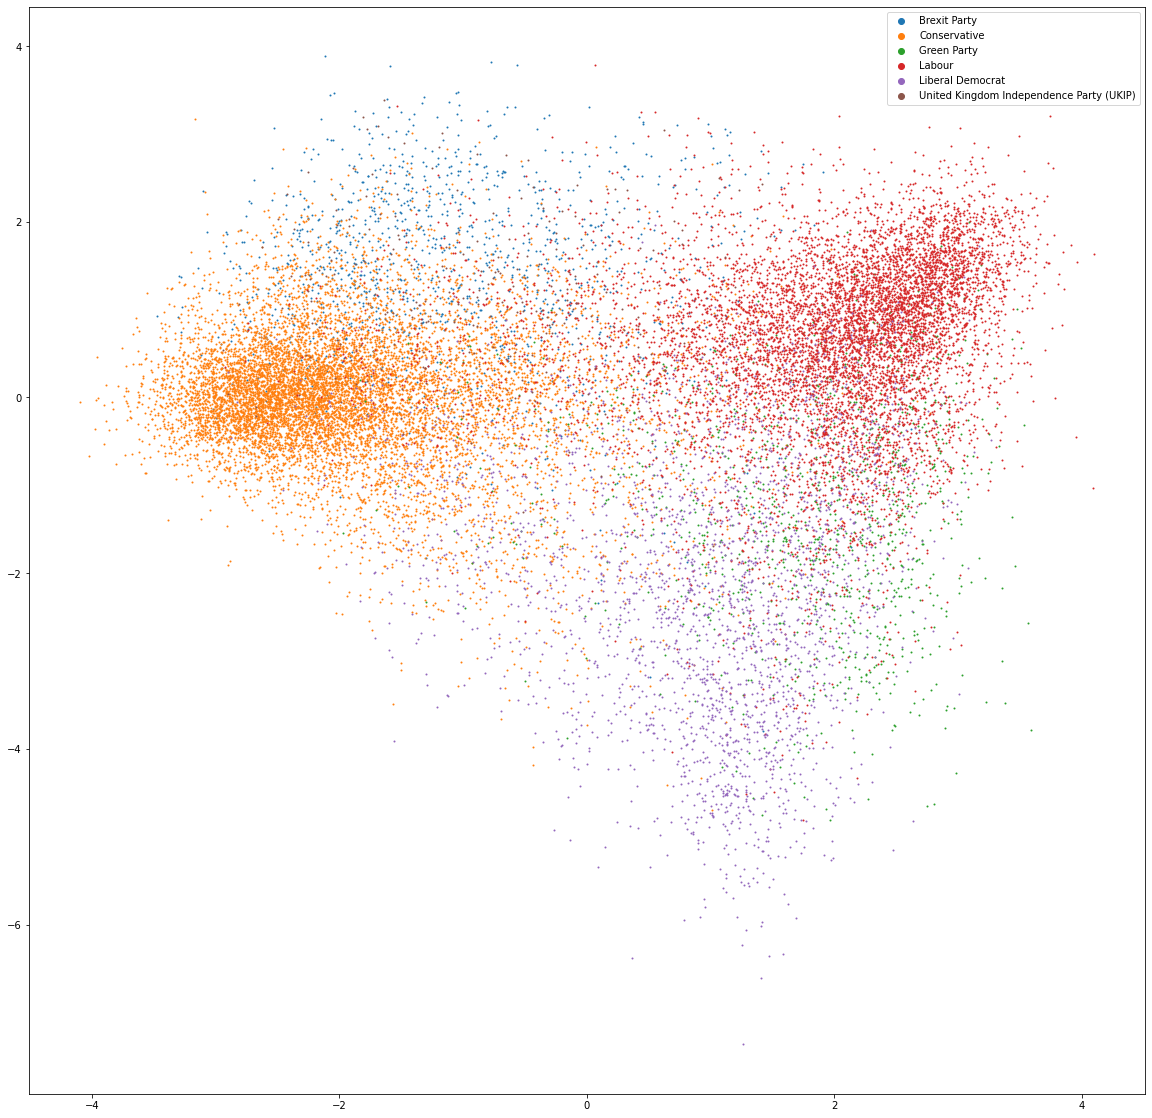

In [142]:
u_labels = np.unique(scaleddf[idmode])
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()
for i in u_labels:
    if i == "No - none" or i == "Don't know"or i =='Scottish National Party (SNP)' or i == "Plaid Cymru":
        continue
    #ax.scatter(x[label == i , 0] ,x[label == i , 1],  x[label == i , 2], label = i,s=1)
    ax.scatter(ldadata[label == i , 0] ,ldadata[label == i , 1], label = i,s=1)
    plt.legend(markerscale =6)
    
plt.show()

C:\Users\kiera\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


6
7
8
9
10
11
12
13
14
15
16
17
QDA


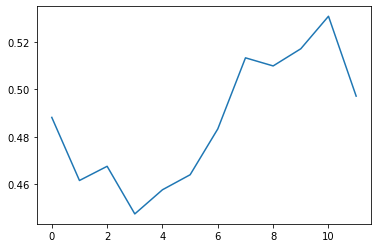

In [143]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis().fit(kmeansdata,scaleddf[idmode])
data = clf.decision_function(kmeansdata)
kmpurity(data,"QDA")

6
7
8
9
10
11
12
13
14
15
16
17
LDA Then QDA


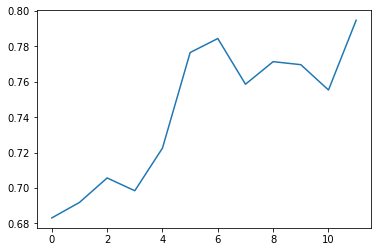

In [144]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)
ldadata = lda.fit_transform(kmeansdata,scaleddf[idmode])
clf = QuadraticDiscriminantAnalysis().fit(ldadata,scaleddf[idmode])
data = clf.decision_function(ldadata)
kmpurity(data,"LDA Then QDA")